# Assignment 8

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [48]:
df = pd.read_csv("https://raw.githubusercontent.com/Akashkunwar/Dscourses/main/Guvi/Assignment/Task%206/data/car_data.csv")

In [49]:
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


In [50]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [51]:
df.corr().style.background_gradient(cmap='coolwarm')

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [52]:
df[['Price','Mileage']].corr().style.background_gradient(cmap='coolwarm')

,Price,Mileage
Price,1.000000,-0.143051
Mileage,-0.143051,1.000000


In [53]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)


1. Linear regression equation for mileage vs price is : Y = -0.12x + 22363.54 

2.


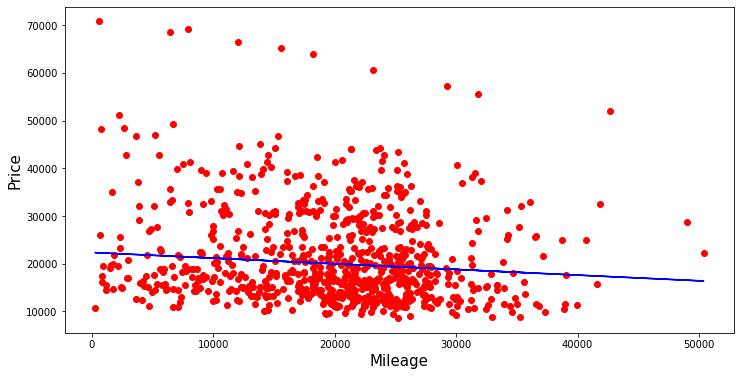


 3. R^2 score is = 0.0205. Which is less than 0.8, so the equation is not a good fit for this data.


In [54]:
model = LinearRegression()
model.fit(df[["Price"]], df[["Mileage"]])

print("1. Linear regression equation for mileage vs price is : "'Y = %.2fx + %.2f \n' % (model.coef_, model.intercept_))
fig, ax = plt.subplots(figsize=(12,6))
plt.scatter(df[["Mileage"]], df[["Price"]], color='red') 
plt.plot(df[["Mileage"]], model.predict(df[["Mileage"]]), color='blue')
plt.ylabel("Price",fontsize = 15)
plt.xlabel('Mileage',fontsize = 15)
plt.show(print("2."))
print('\n 3. R^2 score is = %.4f. Which is less than 0.8, so the equation is not a good fit for this data.'% model.score(df[["Price"]], df[["Mileage"]]))

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

In [55]:
# 1.
# features = ["Mileage", "Cylinder", "Liter","Doors","Cruise","Sound","Leather"]
# price = ["Price"]

x = df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]]
y = df["Price"]

model = LinearRegression()
task = model.fit(x, y)

print("\n 1. model.coef_ : ")
print(list(zip(x, model.coef_)))
print("model.intercept_ : ",model.intercept_)

# 2.
print('\n 2. R^2 is : ', task.score(X,y))
print("**Which is less than 0.8, so the equation is not a good fit for this data.**")

print("\n 3. Combination of the factors that is the best predictor for price are : ")
print(list(zip(["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"],selector.support_)))


 1. model.coef_ : 
[('Mileage', -0.16974783233303692), ('Cylinder', 3792.378930782515), ('Liter', -787.2207316338321), ('Doors', -1542.745846382068), ('Cruise', 6288.997149849932), ('Sound', -1993.795275698427), ('Leather', 3349.361619613555)]
model.intercept_ :  6758.755143598106

 2. R^2 is :  0.4462643536728379
**Which is less than 0.8, so the equation is not a good fit for this data.**

 3. Combination of the factors that is the best predictor for price are : 
[('Mileage', False), ('Cylinder', True), ('Liter', False), ('Doors', False), ('Cruise', True), ('Sound', False), ('Leather', True)]


In [56]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(x,y)
list(zip(["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"],selector.support_))

[('Mileage', False),
 ('Cylinder', True),
 ('Liter', False),
 ('Doors', False),
 ('Cruise', True),
 ('Sound', False),
 ('Leather', True)]

## Tasks, Part 3 (Hard Mode)

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [82]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[["Make","Model","Trim","Type"]])
encoded_cols = list(encoder.get_feature_names(["Make","Model","Trim","Type"]))

df1 = df.copy()
df1[encoded_cols] = encoder.transform(df[["Make","Model","Trim","Type"]])
df1 = df1.drop(["Make","Model","Trim","Type"], axis = 1)

print("1. I use make, model, trim and type by OneHotEncoder and convert it in numerical columns by column names : ")
print(df1.columns)
x1 = df1[list(df1.columns)]
y1 = df1["Price"]

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(x1,y1)
print("\n 2. Best combination of factors to predict price are true values below : ")
list(zip(list(df1.columns),selector.support_))

1. I use make, model, trim and type by OneHotEncoder and convert it in numerical columns by column names : 
Index(['Price', 'Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound',
       'Leather', 'Make_Buick', 'Make_Cadillac', 'Make_Chevrolet',
       'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD',
       'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO',
       'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier',
       'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette',
       'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am',
       'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series',
       'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo',
       'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire',
       'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D',
       'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D',
       'Trim_Arc Conv

[('Price', True),
 ('Mileage', False),
 ('Cylinder', False),
 ('Liter', False),
 ('Doors', False),
 ('Cruise', False),
 ('Sound', False),
 ('Leather', False),
 ('Make_Buick', False),
 ('Make_Cadillac', False),
 ('Make_Chevrolet', False),
 ('Make_Pontiac', False),
 ('Make_SAAB', False),
 ('Make_Saturn', False),
 ('Model_9-2X AWD', False),
 ('Model_9_3', False),
 ('Model_9_3 HO', False),
 ('Model_9_5', False),
 ('Model_9_5 HO', False),
 ('Model_AVEO', False),
 ('Model_Bonneville', False),
 ('Model_CST-V', True),
 ('Model_CTS', False),
 ('Model_Cavalier', False),
 ('Model_Century', True),
 ('Model_Classic', False),
 ('Model_Cobalt', False),
 ('Model_Corvette', False),
 ('Model_Deville', False),
 ('Model_G6', False),
 ('Model_GTO', False),
 ('Model_Grand Am', False),
 ('Model_Grand Prix', False),
 ('Model_Impala', False),
 ('Model_Ion', False),
 ('Model_L Series', False),
 ('Model_Lacrosse', False),
 ('Model_Lesabre', False),
 ('Model_Malibu', False),
 ('Model_Monte Carlo', False),
 ('Mode